In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
%matplotlib inline

In [3]:
symbol = 'BTCUSDT'  # пара торгов
interval = '1h'  # временной интервал
limit = 1000  # количество свечей
start_time = 1609459199000 # начало периода в миллисекундах 31.12.2020 23:59:59 
end_time = 1681153123000 # конец периода в миллисекундах 10.04.2023

In [4]:
base_url = 'https://api.binance.com'
end_point = f'/api/v3/klines'
params = f'?symbol={symbol}&interval={interval}&limit={limit}&startTime='
headers = {}
result = []
while start_time < end_time:
    response = requests.get(base_url + end_point + params + str(start_time), headers=headers)
    data = response.json()
    result.extend(data)
    start_time = data[-1][6] + 1

In [5]:
df = pd.DataFrame(result, columns=['timestamp', 
                                   'open', 
                                   'high', 
                                   'low', 
                                   'close', 
                                   'volume', 
                                   'close_time', 
                                   'quote_asset_volume', 
                                   'number_of_trades', 
                                   'taker_buy_base_asset_volume', 
                                   'taker_buy_quote_asset_volume', 'ignore']
                 )

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

df.drop(columns=['ignore'], axis=1, inplace=True)

df.open = pd.to_numeric(df.open)
df.high = pd.to_numeric(df.high)
df.low = pd.to_numeric(df.low)
df.close = pd.to_numeric(df.close)
df.volume = pd.to_numeric(df.volume)
df.quote_asset_volume = pd.to_numeric(df.quote_asset_volume)
df.taker_buy_base_asset_volume = pd.to_numeric(df.taker_buy_base_asset_volume)
df.taker_buy_quote_asset_volume = pd.to_numeric(df.taker_buy_quote_asset_volume)

In [6]:
df.shape

(20000, 10)

In [7]:
df.head()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,,
2021-01-01 00:00:00,28923.63,29031.34,28690.17,28995.13,2311.811445,1609462799999,6.676883e+07,58389,1215.359238,3.510354e+07
2021-01-01 01:00:00,28995.13,29470.00,28960.35,29409.99,5403.068471,1609466399999,1.583578e+08,103896,3160.041701,9.261399e+07
2021-01-01 02:00:00,29410.00,29465.26,29120.03,29194.65,2384.231560,1609469999999,6.984265e+07,57646,1203.433506,3.525275e+07
2021-01-01 03:00:00,29195.25,29367.00,29150.02,29278.40,1461.345077,1609473599999,4.276078e+07,42510,775.915666,2.270555e+07
2021-01-01 04:00:00,29278.41,29395.00,29029.40,29220.31,2038.046803,1609477199999,5.961464e+07,55414,1003.342834,2.934638e+07


In [8]:
df.dtypes

open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
close_time                        int64
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
dtype: object

In [6]:
# df.to_csv('data.csv', index=True)

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

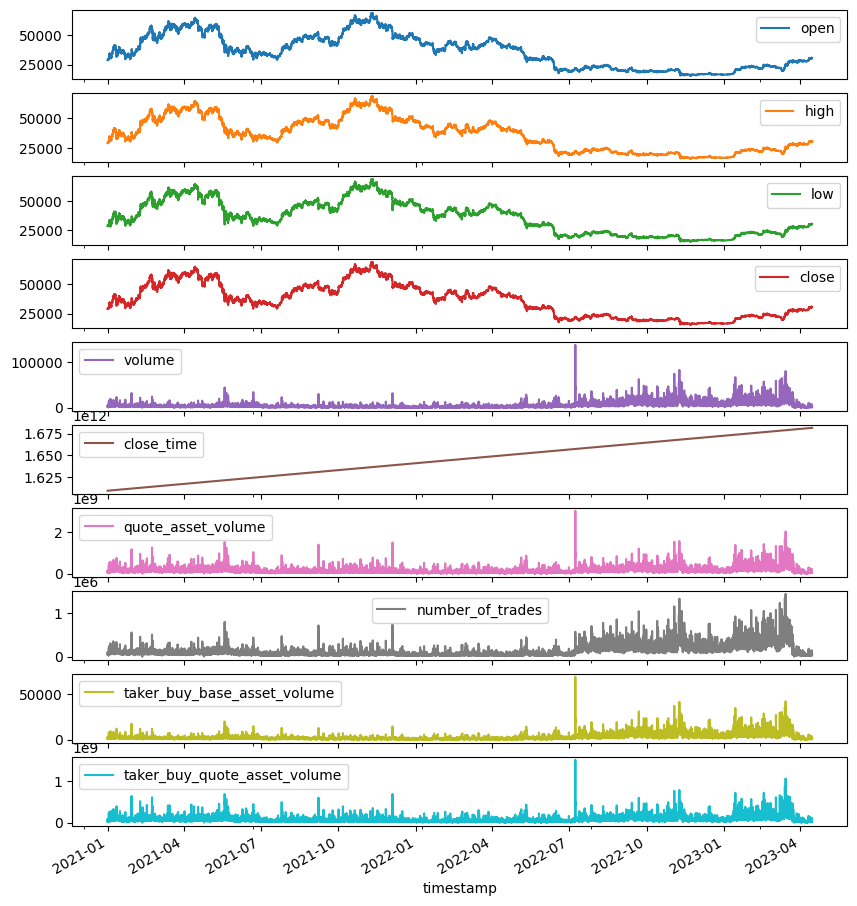

In [9]:
df.plot(subplots=True, figsize=(10,12))

<BarContainer object of 28 artists>

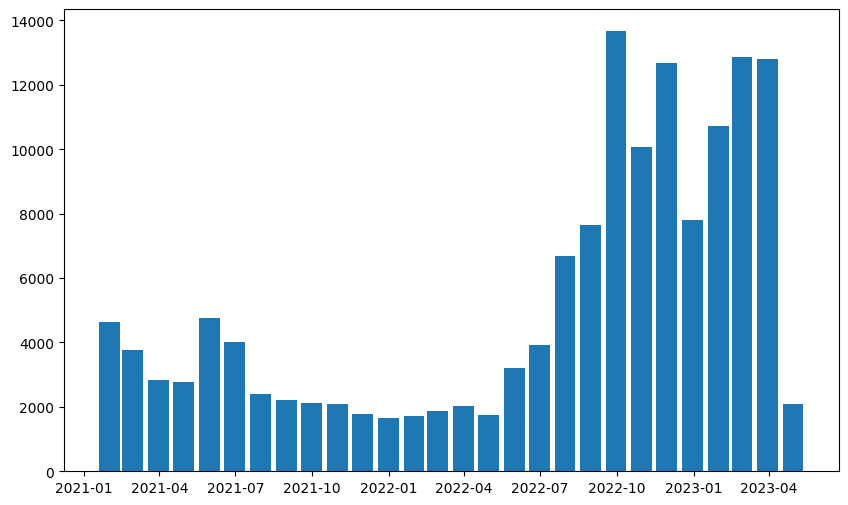

In [10]:
df_month = df.resample('M').mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.bar(df_month['2021':].index,
       df_month.loc['2021':, 'volume'],
       width=25,
       align='center')

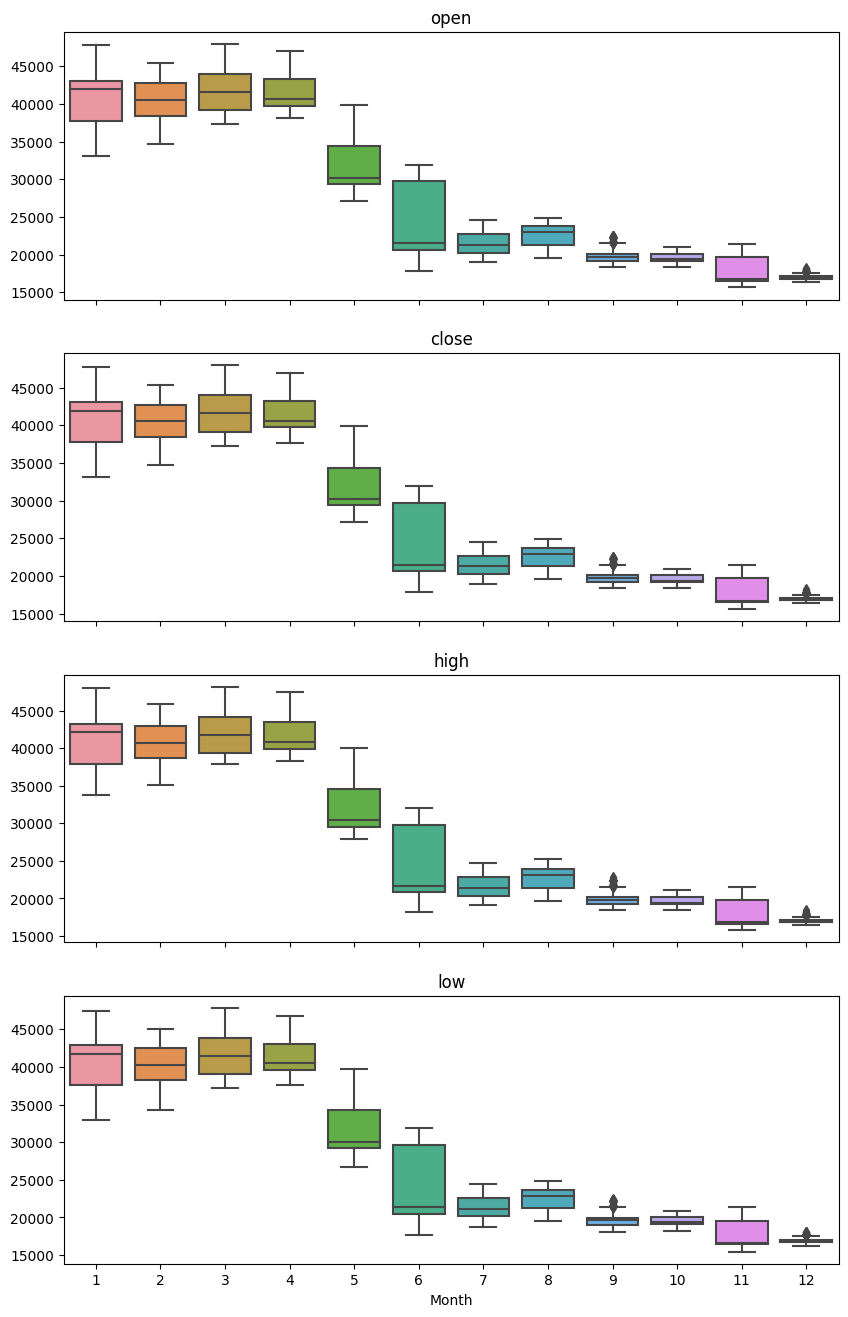

In [11]:
df['Month'] = df.index.month
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
for name, ax in zip(['open', 'close', 'high', 'low'], axes):
    sns.boxplot(data=df.loc[(df.index.year == 2022)], x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

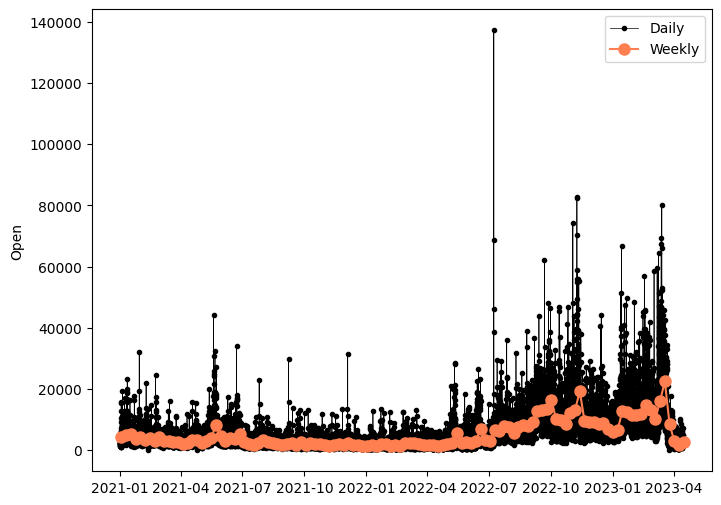

In [12]:
df_week = df.resample('W').mean()
start, end = '2021–01-01', '2023–04-01'
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df.loc[pd.to_datetime(1609459199000, unit='ns'):, 'volume'],
        marker='.', linestyle='-',
        linewidth=0.5, label='Daily',
        color='black')
ax.plot(df_week.loc[pd.to_datetime(1609459199000, unit='ns'):, 'volume'],
        marker='o', markersize=8,
        linestyle='-', label='Weekly',
        color='coral')
ax.set_ylabel('Open')
ax.legend()

In [13]:
df.volume.describe()

count     20000.000000
mean       5290.364206
std        6147.869148
min           0.000000
25%        1632.049293
50%        3094.708195
75%        6628.477215
max      137207.188600
Name: volume, dtype: float64

In [78]:
df.loc[(df.volume == df.volume.max())]

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,,
2022-07-08 15:00:00,21769.09,22130.0,21701.24,21962.52,137207.1886,1657295999999,3.005634e+09,573418,68611.45039,1.502977e+09


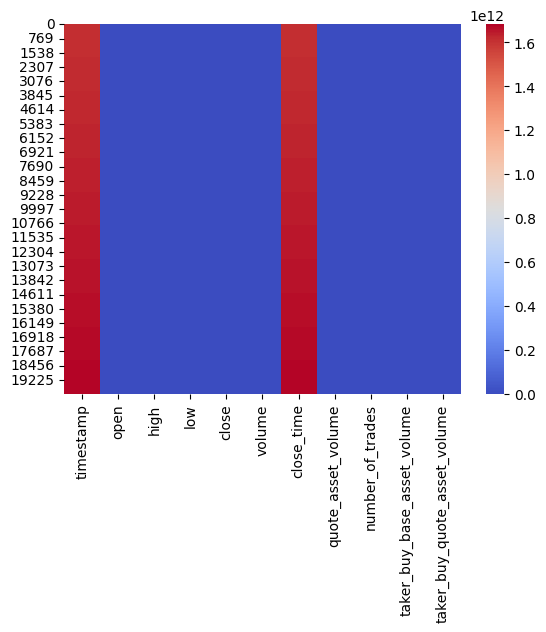

In [8]:
corr = pd.read_csv('decision_tree_data.csv')
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
df1 = pd.DataFrame(result, columns=['timestamp', 
                                   'open', 
                                   'high', 
                                   'low', 
                                   'close', 
                                   'volume', 
                                   'close_time', 
                                   'quote_asset_volume', 
                                   'number_of_trades', 
                                   'taker_buy_base_asset_volume', 
                                   'taker_buy_quote_asset_volume', 'ignore']
                 )
df1.drop(columns=['ignore'], axis=1, inplace=True)

In [20]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df1)
print(X_scaled)

[[0.00000000e+00 2.50541219e-01 2.49132961e-01 ... 4.04889546e-02
  1.77136503e-02 2.33560129e-02]
 [4.99675211e-05 2.51890609e-01 2.57373801e-01 ... 7.20450843e-02
  4.60570602e-02 6.16203785e-02]
 [9.99350422e-05 2.59720282e-01 2.57284753e-01 ... 3.99737327e-02
  1.75398348e-02 2.34552874e-02]
 ...
 [9.99900065e-01 2.76084896e-01 2.73849282e-01 ... 2.61112810e-02
  1.21023928e-02 1.67277915e-02]
 [9.99950032e-01 2.76971530e-01 2.77138404e-01 ... 3.77325520e-02
  2.32097902e-02 3.22265401e-02]
 [1.00000000e+00 2.79325509e-01 2.76914470e-01 ... 2.33125788e-02
  9.91719307e-03 1.37881036e-02]]


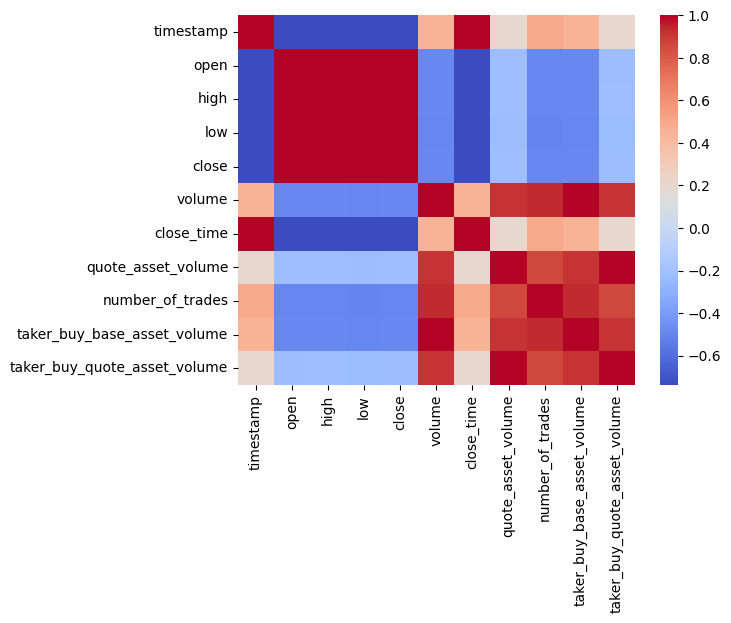

In [21]:
sns.heatmap(df1.corr(), cmap='coolwarm')
plt.show()

In [28]:
import yfinance as yf

# Загружаем цены на акции Apple за период времени с 1 января 2010 года по 31 декабря 2019 года
data = yf.download("AAPL", start="2010-01-01", end="2023-04-01")

print(data.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505281  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516527  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412872  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401016  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443574  447610800


In [29]:
len(data)

3334

In [30]:
dfy = pd.DataFrame(data)

In [31]:
dfy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401016,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [32]:
dfy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700
2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

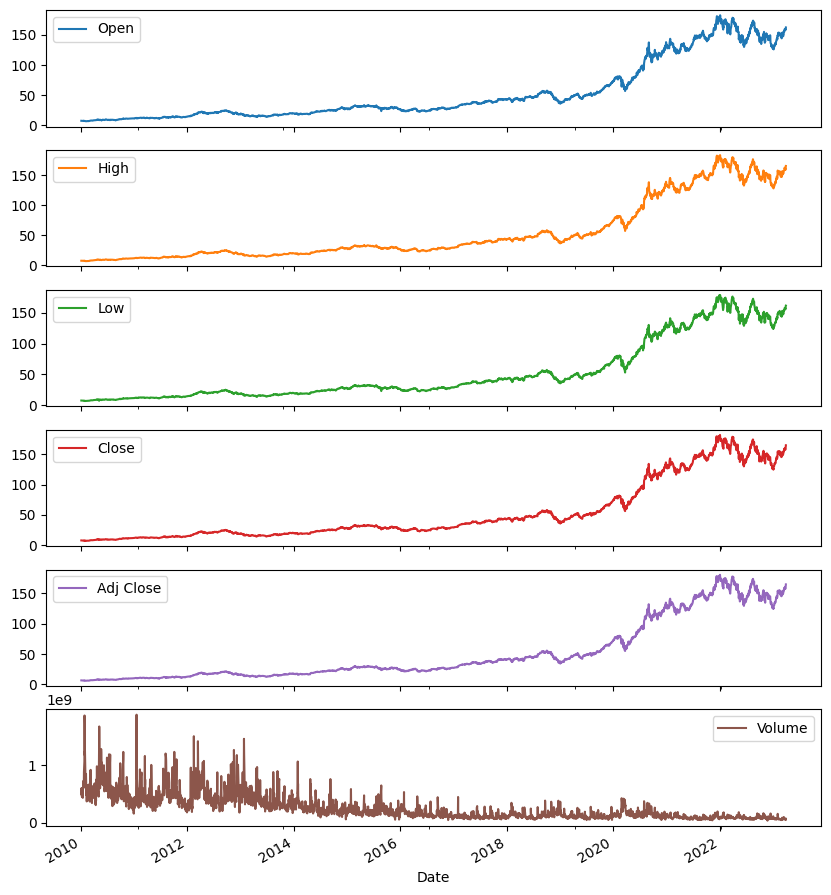

In [33]:
dfy.plot(subplots=True, figsize=(10,12))

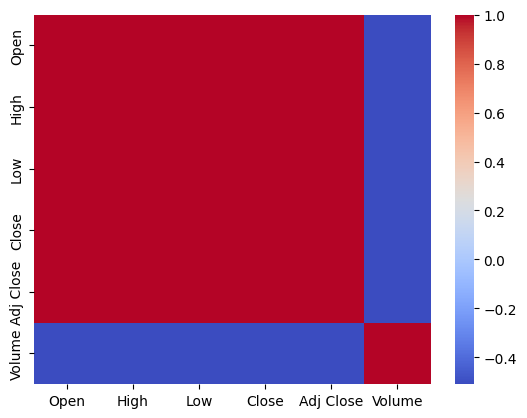

In [34]:
sns.heatmap(dfy.corr(), cmap='coolwarm')
plt.show()

In [35]:
data = yf.download(tickers = "SPY AAPL",  # list of tickers
            period = "1y",         # time period
            interval = "1d",       # trading interval
            prepost = False,       # download pre/post market hours data?
            repair = True)         # repair obvious price errors e.g. 100x?

[*********************100%***********************]  2 of 2 completed


In [36]:
d = pd.DataFrame(data)

In [37]:
d.tail()

Adj Close                   Close                    High   
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2023-04-14  165.210007  412.459991  165.210007  412.459991  166.320007  \
2023-04-17  165.229996  413.940002  165.229996  413.940002  165.389999   
2023-04-18  166.470001  414.209991  166.470001  414.209991  167.410004   
2023-04-19  167.630005  414.140015  167.630005  414.140015  168.160004   
2023-04-20  167.160004  412.309998  167.160004  412.309998  167.399994   

                               Low                    Open               
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2023-04-14  415.089996  163.820007  410.059998  164.589996  412.809998  \
2023-04-17  413.959991  164.029999  411.089996  165.089996  412.369995   
2023-04-18  415.720001  165.649994  412.779999  166.100006  415.579987   
2023-04-19  415.079987  165.539993  412.160004  165.800003  412.220001   
2023-04-20  412.420013  165.910004  411.079987  166.089996  411.209991   

              Volume            
                AAPL       SPY  
Date                            
2023-04-14  49337200  78129500  
2023-04-17  41516200  66436400  
2023-04-18  49923000  63560000  
2023-04-19  47644400  54778800  
2023-04-20  10191640  12917025